In [1]:
## imports 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import pandas as pd
import csv

In [2]:
from bs4 import BeautifulSoup
import requests
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
all_sentences = []
with open('Data/metaphor.txt','r',encoding='utf-8') as f:
    all_sentences = f.readlines()
# all_sentences += df['s'].tolist()

In [4]:
len(all_sentences)

813

In [5]:
reverse_lines = []
for string in all_sentences:
    s = string.split()[::-1]
    l = []
    for i in s:
        l.append(i)
    if(len(l) > 4):
        reverse_lines.append(" ".join(l))
with open("Data/meta_rev.txt",'w', encoding='utf-8') as f:
    for line in reverse_lines:
            f.write(line + '\n')

In [6]:
with open('Data/meta_rev.txt','r',encoding="utf8") as story:
  story_data = story.read()

print(story_data)

prison. a was home Her
eye. my of apple the is She
gold. of heart a has He
darkness. of sea a in light A
ears. her to music is noise The
diamonds. of sea a in swam He
up. stand to legs needs it chair, a is Authority
up. socks your pull better You
love. of sea the in drowning is She
protagonist. the of snapshot slice-of-life a is book the in narrated episode Each
day. cloudy a on shadow fleeting a dream, a is Life
you. bite and back come to tends Life
compass. my West, my and East my is He
executioner. an sun the furnace, a were streets The
handkerchief. snotty a is sky the tenements, side east lower the Between
wind. but are words and sir, you, with word a break may man A
hill. lonely a on hunts that hunter lonely a is heart my But
another. from caresses to hand one from punishment even prefers that spaniel a and food into poison transmute can that alchemist an is Love
god. blood-swollen the animal red the war, at look to going were They absorbed. and quiet appeared men untested the of

Cleaning Process 

In [7]:
import re                                

# Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [8]:
lower_data = story_data.lower()
split_data = lower_data.splitlines()     
# Splitting the data to get every line seperately but this will give the list of uncleaned data

# print(split_data[0])                         

final = ''                               
# initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

# print(final)
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['', 'prison a was home her', 'eye my of apple the is she', 'gold of heart a has he', 'darkness of sea a in light a', 'ears her to music is noise the', 'diamonds of sea a in swam he', 'up stand to legs needs it chair a is authority', 'up socks your pull better you', 'love of sea the in drowning is she', 'protagonist the of snapshot sliceoflife a is book the in narrated episode each', 'day cloudy a on shadow fleeting a dream a is life', 'you bite and back come to tends life', 'compass my west my and east my is he', 'executioner an sun the furnace a were streets the', 'handkerchief snotty a is sky the tenements side east lower the between', 'wind but are words and sir you with word a break may man a', 'hill lonely a on hunts that hunter lonely a is heart my but', 'another from caresses to hand one from punishment even prefers that spaniel a and food into poison transmute can that alchemist an is love', 'god bloodswollen the animal red the war at look to going were they absorbed and quiet

In [9]:
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

2073
{'the': 1, 'a': 2, 'is': 3, 'of': 4, 'and': 5, 'to': 6, 'in': 7, 'was': 8, 'are': 9, 'my': 10, 'you': 11, 'i': 12, 'it': 13, 'that': 14, 'her': 15, 'his': 16, 'he': 17, 'with': 18, 'life': 19, 'all': 20, 'love': 21, 'on': 22, 'she': 23, 'but': 24, 'at': 25, 'for': 26, 'me': 27, 'an': 28, 'your': 29, 'from': 30, 'were': 31, 'has': 32, 'be': 33, 'we': 34, 'sky': 35, 'their': 36, 'time': 37, 'if': 38, 'up': 39, 'they': 40, 'its': 41, 'into': 42, 'heart': 43, 'this': 44, 'him': 45, 'just': 46, 'words': 47, 'light': 48, 'like': 49, 'soul': 50, 'have': 51, 'sun': 52, 'not': 53, 'when': 54, 'music': 55, 'by': 56, 'sea': 57, 'world': 58, 'im': 59, 'our': 60, 'wind': 61, 'one': 62, 'down': 63, 'us': 64, 'what': 65, 'away': 66, 'out': 67, 'night': 68, 'road': 69, 'then': 70, 'eyes': 71, 'through': 72, 'over': 73, 'mind': 74, 'as': 75, 'go': 76, 'who': 77, 'day': 78, 'where': 79, 'voice': 80, 'so': 81, 'had': 82, 'place': 83, 'hope': 84, 'fire': 85, 'now': 86, 'ears': 87, 'even': 88, 'can': 

In [10]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[212, 2], [212, 2, 8], [212, 2, 8, 213], [212, 2, 8, 213, 15], [167, 10], [167, 10, 4], [167, 10, 4, 168], [167, 10, 4, 168, 1], [167, 10, 4, 168, 1, 3], [167, 10, 4, 168, 1, 3, 23], [292, 4], [292, 4, 43], [292, 4, 43, 2], [292, 4, 43, 2, 32], [292, 4, 43, 2, 32, 17], [134, 4], [134, 4, 57], [134, 4, 57, 2], [134, 4, 57, 2, 7], [134, 4, 57, 2, 7, 48], [134, 4, 57, 2, 7, 48, 2], [87, 15], [87, 15, 6], [87, 15, 6, 55], [87, 15, 6, 55, 3], [87, 15, 6, 55, 3, 293], [87, 15, 6, 55, 3, 293, 1], [169, 4], [169, 4, 57], [169, 4, 57, 2], [169, 4, 57, 2, 7], [169, 4, 57, 2, 7, 444], [169, 4, 57, 2, 7, 444, 17], [39, 445], [39, 445, 6], [39, 445, 6, 214], [39, 445, 6, 214, 294], [39, 445, 6, 214, 294, 13], [39, 445, 6, 214, 294, 13, 295], [39, 445, 6, 214, 294, 13, 295, 2], [39, 445, 6, 214, 294, 13, 295, 2, 3], [39, 445, 6, 214, 294, 13, 295, 2, 3, 446], [39, 786], [39, 786, 29], [39, 786, 29, 447], [39, 786, 29, 447, 296], [39, 786, 29, 447, 296, 11], [21, 4], [21, 4, 57], [21, 4, 57, 1], [21

In [11]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)
# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

57
[[   0    0    0 ...    0  212    2]
 [   0    0    0 ...  212    2    8]
 [   0    0    0 ...    2    8  213]
 ...
 [   0    0    0 ... 2073    2    3]
 [   0    0    0 ...    2    3  704]
 [   0    0    0 ...    3  704   14]]


In [12]:
xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[   0    0    0 ...    0    0  212]
 [   0    0    0 ...    0  212    2]
 [   0    0    0 ...  212    2    8]
 ...
 [   0    0    0 ...    0 2073    2]
 [   0    0    0 ... 2073    2    3]
 [   0    0    0 ...    2    3  704]]
labels: [  2   8 213 ...   3 704  14]


In [13]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [15]:
# # using the functional APIs of keras to define the model
# i = Input(shape=(max_seq_length - 1, ))                           
# # using 1 less value becasuse we are preserving the last value for predicted word 
# x = Embedding(vocab_size, 124)(i)
# x = Dropout(0.2)(x)
# x = LSTM(520, return_sequences=True)(x)
# x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(vocab_size, activation='softmax')(x)

# model = Model(i,x)

In [55]:
# using the functional APIs of keras to define the model
i = Input(shape=(max_seq_length - 1, ))                           
# using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

In [56]:
model.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()    

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 56)]              0         
                                                                 
 embedding_5 (Embedding)     (None, 56, 124)           257176    
                                                                 
 dropout_8 (Dropout)         (None, 56, 124)           0         
                                                                 
 lstm_13 (LSTM)              (None, 56, 520)           1341600   
                                                                 
 bidirectional_5 (Bidirectio  (None, 56, 680)          2341920   
 nal)                                                            
                                                                 
 global_max_pooling1d_5 (Glo  (None, 680)              0         
 balMaxPooling1D)                                          

In [57]:
r = model.fit(xs,ys,epochs=50)

Epoch 1/50
217/217 [==============================] - 14s 44ms/step - loss: 6.2981 - accuracy: 0.0691
Epoch 2/50
217/217 [==============================] - 10s 46ms/step - loss: 5.8957 - accuracy: 0.0714
Epoch 3/50
217/217 [==============================] - 11s 49ms/step - loss: 5.6717 - accuracy: 0.0818
Epoch 4/50
217/217 [==============================] - 12s 54ms/step - loss: 5.4203 - accuracy: 0.1091
Epoch 5/50
217/217 [==============================] - 14s 64ms/step - loss: 5.1916 - accuracy: 0.1181
Epoch 6/50
217/217 [==============================] - 14s 65ms/step - loss: 5.0270 - accuracy: 0.1231
Epoch 7/50
217/217 [==============================] - 14s 66ms/step - loss: 4.8584 - accuracy: 0.1329
Epoch 8/50
217/217 [==============================] - 16s 72ms/step - loss: 4.7000 - accuracy: 0.1451
Epoch 9/50
217/217 [==============================] - 14s 66ms/step - loss: 4.5704 - accuracy: 0.1580
Epoch 10/50
217/217 [==============================] - 15s 70ms/step - loss: 4.434

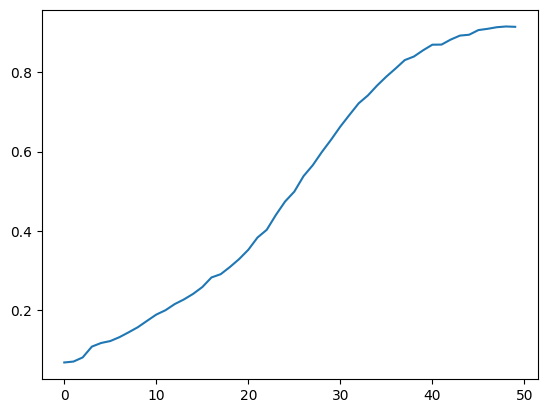

In [58]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [59]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
#     print(seed)
    if(i==no_words-1):
        return seed
    



In [75]:
seed_text = 'them'
next_words = 5
sentence = predict_words(seed_text, next_words)
words = sentence.split()
reversed_sentence = " ".join(words[::-1])
print(reversed_sentence)


1/1 [==============================] - 0s 78ms/step
had a huge impact on them


In [67]:
model.save('new_metaphor_generator.h5') # Will create a HDF5 file of the model

In [68]:
with open('meta_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [69]:
tokenizer.word_index
max_seq_length

57

In [24]:
import pickle